I have a text dataset with 5572 records(documents). Here, I am trying to predict weather the future text will be 
under ham or spam by using open source python library NLTK and other different modules.

In [68]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs

# import the ML algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# For text processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# pip install -U spacy
import spacy
from spacy.lang.en import English

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

# Text - visualization
# pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.feature_extraction.text import CountVectorizer

# import libraries for model validation
from sklearn.model_selection import train_test_split 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

Lets start with a simple example:

In [2]:
simple_train=['I am fine @@! , & %','please call me', 'I will meet you there .. please take care']

In [3]:
# Instantiate the model with defaul parameters
vect = CountVectorizer()

In [4]:
# learn the vocabulary of the training data (occurs in-place)
# lower case (default)
# stop_words = none (default)| 'english'
# no duplicates
# sorted
vect.fit(simple_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [5]:
# get the fitted vocabulary / All the features
vect.get_feature_names()

['am',
 'call',
 'care',
 'fine',
 'me',
 'meet',
 'please',
 'take',
 'there',
 'will',
 'you']

In [6]:
# transform the training data into a 'document-term matrix(sparse matrix)'
dtm = vect.transform(simple_train)

In [7]:
dtm

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [8]:
# convert sparse matrix to a dense matrix
dtm.toarray()

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1]], dtype=int64)

In [9]:
# Get vocabulary and document-term frequency together
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

,am,call,care,fine,me,meet,please,take,there,will,you
0,1,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,1,0,1,0,0,0,0
2,0,0,1,0,0,1,1,1,1,1,1


In [10]:
# Vectorization is the general process of turning a collection of text 
# documents into numerical feature vectors. This specific strategy 
# (tokenization, counting and normalization) is called the BAG OF WORDS or
# "BAG OF n-grams" representation.
# Documents are described by word occurances while completely ignoring the 
# relative position information of the words in the doucments

In [11]:
# check the type of document-term matrix
type(dtm)

scipy.sparse.csr.csr_matrix

In [12]:
# see the content of document-term matrix
print(dtm)

  (0, 0)	1
  (0, 3)	1
  (1, 1)	1
  (1, 4)	1
  (1, 6)	1
  (2, 2)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (2, 9)	1
  (2, 10)	1


In [13]:
# example text for testing the model
test = [' please call me ']

In [14]:
# build document-term matrix for the test data
test_dtm = vect.transform(test)

In [15]:
test_dtm

<1x11 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [16]:
# notice the token "don't" does not appear in the dtm
# bcoz the token "don't" does not appear in the vocabulary
test_dtm.toarray()

array([[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0]], dtype=int64)

In [17]:
# Get vocabulary and document-term frequency together
pd.DataFrame(test_dtm.toarray(), columns=vect.get_feature_names())

,am,call,care,fine,me,meet,please,take,there,will,you
0,0,1,0,0,1,0,1,0,0,0,0


In [18]:
# Summary
# vect.fit(train) --- learns the vocabulary of the training data
# vect.transform(transform) --- uses fitted vocabulary to build a document-term
#                               matrix
# vect.transform(test) --- uses fitted vocabulary to build document-term matrix 
#                          from the testing data (and ignores the tokens not in 
#                          fitted vocabulary
# 

In [19]:
sms = pd.read_table('C://Users//disoj//Desktop//Datasets//DATASETS//sms.tsv', header=None, names=['label', 'message'])

In [20]:
sms.sample(10)

,label,message
2687,ham,There r many model..sony ericson also der.. &l...
5218,ham,I accidentally brought em home in the box
2916,ham,Nothing lor... A bit bored too... Then y dun u...
1192,ham,Come to my home for one last time i wont do an...
4708,ham,Wif my family booking tour package.
359,ham,"I'm an actor. When i work, i work in the eveni..."
4640,ham,Of course. I guess god's just got me on hold r...
2778,ham,Kind of. Took it to garage. Centre part of exh...
5568,ham,Will ü b going to esplanade fr home?
731,spam,Email AlertFrom: Jeri StewartSize: 2KBSubject:...


In [21]:
# get the class distributionsms.label.value_counts()
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [22]:
# convert label to a numerical variable
sms['label_num']=sms.label.map({'ham':0,'spam':1})

In [23]:
sms.head(10)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [24]:
# Lets save the ham and spam message separately:
X_ham=sms[sms.label_num==0].message
X_spam=sms[sms.label_num==1].message

In [25]:
X_ham.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: message, dtype: object

In [26]:
X_spam.head()

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: message, dtype: object

In [27]:
# define X and y for use with CountVectorizer
# it is important you send 1 dimensional object to CountVectorizer, which
# it will use to convert to 2-dimensionsal objects
X = sms.message
y = sms.label_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [28]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [29]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: label_num, dtype: int64

In [30]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [32]:
X_train[:5]

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: message, dtype: object

In [33]:
# vectorizing the dataset

# instantiate the vectorizer
vect = CountVectorizer()

In [34]:
# learn training data vocabulary, then use it to create the fitted vocabulary
# and create the document-term matrix to explore all the terms and to see if a specific term appear in a specific document.
# 2-step process
%time
vect.fit(X_train)                     # create the fitted vocabulary, BoW

X_train_dtm = vect.transform(X_train) # create the document-term matrix, vectorization

Wall time: 0 ns


In [35]:
# Same can be achieved with 1 step also
# FASTER
%time
X_train_dtm = vect.fit_transform(X_train)

Wall time: 0 ns


In [36]:
 #print(vect.get_feature_names())

In [37]:
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [38]:
# this will print the sparse matrix, only the 1s
print(X_train_dtm)

  (0, 509)	1
  (0, 3181)	1
  (0, 5193)	1
  (0, 4781)	1
  (0, 3971)	1
  (0, 5479)	1
  (0, 3880)	1
  (0, 1572)	1
  (0, 4987)	1
  (0, 2864)	2
  (0, 3170)	1
  (0, 7424)	1
  (0, 4983)	1
  (0, 264)	1
  (0, 1552)	1
  (0, 4375)	1
  (0, 4743)	1
  (0, 50)	1
  (0, 6656)	1
  (0, 6892)	1
  (0, 4662)	1
  (0, 4779)	1
  (0, 2022)	1
  (1, 2222)	1
  (1, 7420)	1
  :	:
  (4177, 4255)	1
  (4177, 4446)	1
  (4177, 4778)	1
  (4177, 2744)	1
  (4177, 254)	1
  (4177, 5490)	1
  (4177, 2556)	1
  (4177, 4508)	1
  (4177, 6034)	1
  (4177, 6662)	1
  (4177, 307)	1
  (4177, 837)	1
  (4177, 3700)	1
  (4177, 5796)	1
  (4177, 358)	1
  (4177, 4934)	1
  (4177, 2453)	1
  (4177, 2097)	1
  (4177, 5403)	1
  (4177, 2786)	1
  (4177, 6577)	1
  (4178, 1691)	1
  (4178, 4238)	1
  (4178, 7257)	1
  (4178, 5999)	1


In [39]:
# this will print the dense matrix, both 1s and 0s
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
# Number of rows = number of training samples,
# number of columns = features
X_train_dtm.shape

(4179, 7456)

In [41]:
# transform testing data (using fitted vocabulary) into a document-term maxtri
# with test data, we do not do fit
# Matrix will be Number of testing samples x No of features in Vect (training)
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

In [42]:
# Build Model
# Multinomial Naive Bayes classifier is suitable for classification with 
# DISCRETE features (word counts for text classification)
# The multinomial distribution normally requires integer feature counts.
# However, in practice, fractional counts such as tf-idf may also work
nb = MultinomialNB()

In [43]:
# train the model using X_train_dtm
# time it with an Ipython "magic command"
%time nb.fit(X_train_dtm, y_train)

Wall time: 316 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [45]:
y_pred_class.shape

(1393,)

In [46]:
y_pred_class

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [47]:
# Calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_class)

0.9885139985642498

In [48]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1203,    5],
       [  11,  174]], dtype=int64)

In [49]:
# Label 1 - POSITIVE (Spam)
# Label 0 - NEGATIVE (Ham)
# [[TN,  FP ],
#  [FN , TP]]
# FP - Falsely 'predicted' POSITIVE
# FN - Falsely 'predicted' NEGATIVE

In [50]:
# FALSE POSITIVE
X_test[(y_test==0) & (y_pred_class ==1)]

# Same as
# X_test[y_pred_class > y_test==0]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [51]:
# FALSE NEGATIVE
X_test[(y_test==1) & (y_pred_class ==0)]

# Same as
# X_test[y_pred_class < y_test==0]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [52]:
# Calculate the predicted proobabilities for X_test
nb.predict_proba(X_test_dtm)

array([[9.97122551e-01, 2.87744864e-03],
       [9.99981651e-01, 1.83488846e-05],
       [9.97926987e-01, 2.07301295e-03],
       ...,
       [9.99998910e-01, 1.09026171e-06],
       [1.86697467e-10, 1.00000000e+00],
       [9.99999996e-01, 3.98279868e-09]])

In [53]:
nb.predict_proba(X_test_dtm).shape

(1393, 2)

In [54]:
# Calculate the predicted probabilities for X-test_dtm (poorly caliberated)
# why 1
# positive class
y_pred_proba = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_proba

array([2.87744864e-03, 1.83488846e-05, 2.07301295e-03, ...,
       1.09026171e-06, 1.00000000e+00, 3.98279868e-09])

In [55]:
print(y_test.shape)
print(y_pred_proba.shape)

(1393,)
(1393,)


In [56]:
# Calculate AUC

metrics.roc_auc_score(y_test, y_pred_proba)

0.9866431000536962

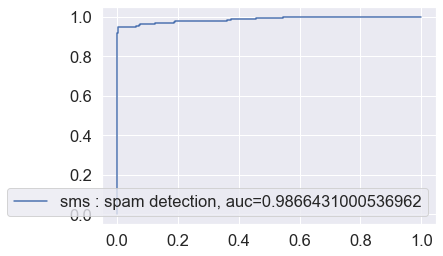

In [57]:
import matplotlib.pyplot as plt
y_pred_proba = nb.predict_proba(X_test_dtm)[:,1]

# sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
# sklearn.metrics.roc_curve(y_true, y_score, pos_label=None)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="sms : spam detection, auc="+str(auc))
plt.legend(loc=4)

In [58]:
words_ham = ' '.join(X_ham)

In [59]:
# words_ham
type(words_ham)

str

In [60]:
wordcloud = WordCloud(width = 800, 
                     height = 800, 
                     background_color ='white', 
                     #stopwords = stopwords, 
                     min_font_size = 10).generate(words_ham) 

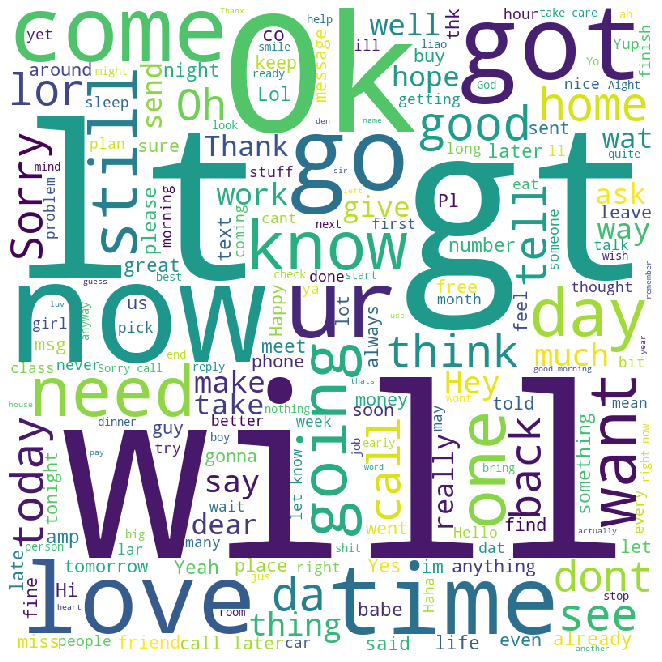

In [61]:
# plot the WordCloud image                        
plt.figure(figsize = (9, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

In [62]:
words_spam = ' '.join(X_spam)

In [63]:
type(words_spam)

str

In [64]:
wordcloud = WordCloud(width = 800, 
                     height = 800, 
                     background_color ='white', 
                     #stopwords = stopwords, 
                     min_font_size = 10).generate(words_spam) 

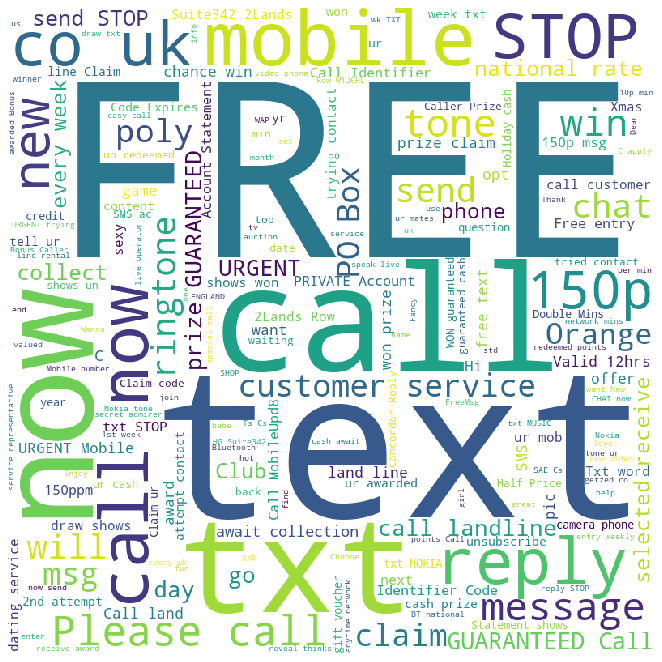

In [65]:
# plot the WordCloud image                        
plt.figure(figsize = (9, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

In [66]:
metrics.roc_curve(y_test,  y_pred_proba)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00165563, 0.00248344, 0.00248344, 0.00413907, 0.00413907,
        0.01241722, 0.01490066, 0.0455298 , 0.04801325, 0.06374172,
        0.06374172, 0.07284768, 0.07284768, 0.07698675, 0.07698675,
        0.08360927, 0.08609272, 0.0968543 , 0.09850993, 0.12417219,
        0.12417219, 0.16887417, 0.1705298 , 0.18046358, 0.18294702,
        0.18874172, 0.18874172, 0.19039735, 0.19039735, 0.22019868,
        0.2218543 , 0.22268212, 0.22433775, 0.25413907, 0.25662252,
        0.28145695, 0.28311258, 0.31705298, 0.32533113, 0.36175497,
        0.36175497, 0.37334437, 0.37334437, 0.3865894 , 0.38824503,
        0.44039735, 0.44205298, 0.45612583, 0.45612583, 0.54718543,
        0.54718543, 0.54884106, 0.55049669, 0.66804636, 0.66970199,
        0.78476821, 0.78642384, 0.87665563, 0.87

In [69]:
# Compare models
# Logistic regression, despite its name is a linear model for classification 
# rather than regression. Also known as "logit regression", Maximum-entropy
# classification (MaxEnt) or log-linear classifier.
# 
logreg = LogisticRegression()

In [70]:
# train the model
%time logreg.fit(X_train_dtm, y_train)

# slower than NB

C:\Users\disoj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 465 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
# Predict using X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [72]:
# Calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_class)

0.9877961234745154

In [73]:
# Calculate the predicted probabilities for X-test_dtm (poorly caliberated)
# why 1
# positive class
# probabilities are well caliberated
print(logreg.predict_proba(X_test_dtm))

y_pred_proba = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_proba

[[0.98730444 0.01269556]
 [0.99652817 0.00347183]
 [0.99383483 0.00616517]
 ...
 [0.96645093 0.03354907]
 [0.00274947 0.99725053]
 [0.99842294 0.00157706]]


array([0.01269556, 0.00347183, 0.00616517, ..., 0.03354907, 0.99725053,
       0.00157706])

In [74]:
# Calculate AUC

metrics.roc_auc_score(y_test, y_pred_proba)

0.9936817612314301

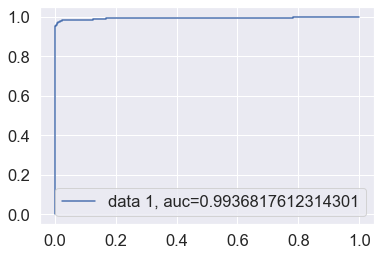

In [75]:
import matplotlib.pyplot as plt
y_pred_proba = logreg.predict_proba(X_test_dtm)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [76]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1207,    1],
       [  16,  169]], dtype=int64)

In [77]:
# Examine a model

# Get all the tokens/features
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

7456

In [78]:
X_train_tokens[0:10]

['00',
 '000',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400']

In [79]:
X_train_tokens[-10:]

['zed',
 'zeros',
 'zhong',
 'zindgi',
 'zoe',
 'zoom',
 'zouk',
 'zyada',
 'èn',
 '〨ud']

In [80]:
# Naive Bayes counts the number of time each token appears in each class because of conditional probaility.
# trailing _ attribute ... means scikit learn creates this during the training process (fit process).
nb.feature_count_

array([[ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 5., 23.,  2., ...,  0.,  0.,  0.]])

In [81]:
type(nb.feature_count_)

numpy.ndarray

In [82]:
nb.feature_count_.shape

(2, 7456)

In [83]:
# capture the ham & spam rows from the array
ham_token_count = nb.feature_count_[0, :]
spam_token_count = nb.feature_count_[1, :]

In [84]:
# create a dataframe
tokens = pd.DataFrame({'tokens': X_train_tokens, 'ham': ham_token_count, 'spam': spam_token_count})

In [85]:
tokens.head()

,tokens,ham,spam
0,00,0.0,5.0
1,000,0.0,23.0
2,008704050406,0.0,2.0
3,0121,0.0,1.0
4,01223585236,0.0,1.0


In [86]:
# display 10 random tokens
tokens.sample(10, random_state=6)

,tokens,ham,spam
6977,very,64.0,2.0
4521,nasty,1.0,1.0
6999,villa,0.0,1.0
1266,beloved,1.0,0.0
6522,textoperator,0.0,2.0
1035,arng,2.0,0.0
250,1013,0.0,1.0
5703,scores,1.0,1.0
4504,nahi,2.0,0.0
4036,long,35.0,0.0


In [87]:
# naive bayes counts the number of observations in each class
nb.class_count_

array([3617.,  562.])

In [88]:
tokens['ham'] = tokens.ham + 1
tokens['spam'] = tokens.spam + 1

tokens.sample(5, random_state=6)

,tokens,ham,spam
6977,very,65.0,3.0
4521,nasty,2.0,2.0
6999,villa,1.0,2.0
1266,beloved,2.0,1.0
6522,textoperator,1.0,3.0


In [89]:
# convert the ham and spam counts into frequencies
tokens['ham'] = tokens.ham/ nb.class_count_[0]
tokens['spam'] = tokens.spam/ nb.class_count_[1]
tokens.sample(5, random_state=6)

,tokens,ham,spam
6977,very,0.017971,0.005338
4521,nasty,0.000553,0.003559
6999,villa,0.000276,0.003559
1266,beloved,0.000553,0.001779
6522,textoperator,0.000276,0.005338


In [90]:
# calculate the ratio of spam-to-ham for each token
tokens['spam_ratio'] = tokens.spam/tokens.ham
tokens.sample(5, random_state=6)

,tokens,ham,spam,spam_ratio
6977,very,0.017971,0.005338,0.297044
4521,nasty,0.000553,0.003559,6.435943
6999,villa,0.000276,0.003559,12.871886
1266,beloved,0.000553,0.001779,3.217972
6522,textoperator,0.000276,0.005338,19.307829


In [91]:
# examine the dataframe sorted by spam_ratio
tokens.sort_values('spam_ratio', ascending=False)

,tokens,ham,spam,spam_ratio
1766,claim,0.000276,0.158363,572.798932
5209,prize,0.000276,0.135231,489.131673
293,150p,0.000276,0.087189,315.361210
6680,tone,0.000276,0.085409,308.925267
3139,guaranteed,0.000276,0.076512,276.745552
...,...,...,...,...
2066,da,0.032900,0.001779,0.054084
5824,she,0.035665,0.001779,0.049891
3244,he,0.047000,0.001779,0.037858
4093,lt,0.064142,0.001779,0.027741


In [92]:
# look up for a specfic token
tokens.loc[tokens['tokens'] == 'tariff']

,tokens,ham,spam,spam_ratio


In [93]:
# vectorizer tuning
import nltk
from nltk.corpus import stopwords
from string import punctuation

# Stemmer
from nltk.stem import PorterStemmer
porter = PorterStemmer()

# lemmatizing
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [94]:
# Stopwords from stopwords-json
# https://raw.githubusercontent.com/6/stopwords-json/master/dist/en.json

stopwords_json = {"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}

In [95]:
stopwords_json


{'en': ['a',
  "a's",
  'able',
  'about',
  'above',
  'according',
  'accordingly',
  'across',
  'actually',
  'after',
  'afterwards',
  'again',
  'against',
  "ain't",
  'all',
  'allow',
  'allows',
  'almost',
  'alone',
  'along',
  'already',
  'also',
  'although',
  'always',
  'am',
  'among',
  'amongst',
  'an',
  'and',
  'another',
  'any',
  'anybody',
  'anyhow',
  'anyone',
  'anything',
  'anyway',
  'anyways',
  'anywhere',
  'apart',
  'appear',
  'appreciate',
  'appropriate',
  'are',
  "aren't",
  'around',
  'as',
  'aside',
  'ask',
  'asking',
  'associated',
  'at',
  'available',
  'away',
  'awfully',
  'b',
  'be',
  'became',
  'because',
  'become',
  'becomes',
  'becoming',
  'been',
  'before',
  'beforehand',
  'behind',
  'being',
  'believe',
  'below',
  'beside',
  'besides',
  'best',
  'better',
  'between',
  'beyond',
  'both',
  'brief',
  'but',
  'by',
  'c',
  "c'mon",
  "c's",
  'came',
  'can',
  "can't",
  'cannot',
  'cant',
  'cau

In [96]:
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(stopwords.words('english'))
stopwords_punct = set(punctuation)

In [97]:
# Combine the stopwords. Its a lot longer so I'm not printing it out...
stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en, stopwords_punct)

In [101]:
vect = CountVectorizer(stop_words=stoplist_combined, 
                       token_pattern='(?u)\\b[a-zA-Z]{3,}\\b')

In [102]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={'!', '"', '#', '$', '%', '&', "'", '(', ')', '*',
                            '+', ',', '-', '.', '/', ':', ';', '<', '=', '>',
                            '?', '@', '[', '\\', ']', '^', '_', '`', 'a', "a's", ...},
                strip_accents=None, token_pattern='(?u)\\b[a-zA-Z]{3,}\\b',
                tokenizer=None, vocabulary=None)

In [103]:
# learn training data vocabulary, then use it to create the fitted vocabulary
# and create the document-term matrix
# 2-step process
%time
vect.fit(X_train)                     # create the fitted vocabulary
X_train_dtm = vect.transform(X_train) # create the document-term matrix

Wall time: 0 ns


C:\Users\disoj\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['mon'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [104]:
# Number of rows = number of training samples,
# number of columns = features
X_train_dtm.shape

(4179, 5943)

In [105]:
# transform testing data (using fitted vocabulary) into a document-term maxtri
# with test data, we do not do fit
# Matrix will be Number of testing samples x No of features in Vect (training)
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x5943 sparse matrix of type '<class 'numpy.int64'>'
	with 7238 stored elements in Compressed Sparse Row format>

In [106]:
# Build Model
# Multinomial Naive Bayes classifier is suitable for classification with 
# DISCRETE features (word counts for text classification)
# The multinomial distribution normally requires integer feature counts.
# However, in practice, fractional counts such as tf-idf may also work
nb = MultinomialNB()

In [107]:
# train the model using X_train_dtm
# time it with an Ipython "magic command"
%time nb.fit(X_train_dtm, y_train)

Wall time: 11 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [108]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [109]:
# Calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_class)

0.9806173725771715

In [110]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1192,   16],
       [  11,  174]], dtype=int64)